In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_long_salary_18-19')

In [3]:
tes.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [4]:
tes.head()

,NAME,LONG,LONG_rank,salary
0,Vance McDonald,75,2.5,6550000
1,David Njoku,66,5.0,2381274
2,Jimmy Graham,54,7.5,10000000
3,Evan Engram,54,7.5,2679576
4,Vernon Davis,53,9.5,5000000


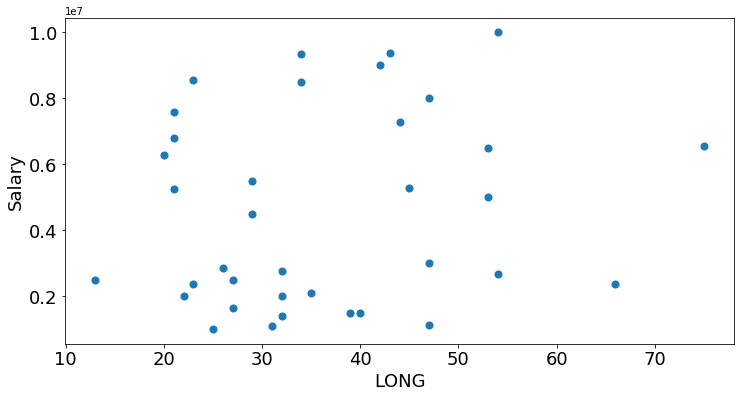

In [5]:
ax = tes.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['LONG', 'salary']])

In [7]:
X.mean(axis = 0)

array([-4.31753398e-17, -6.16790569e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.93359847,  0.61068059],
       [ 0.66280302, -0.92199087],
       [-0.66805054, -0.90144273],
       [ 0.45728449,  1.45870682],
       [ 1.60735786,  0.18831105]])

In [11]:
km.predict(X)

array([4, 4, 3, 1, 4, 4, 1, 1, 3, 4, 3, 3, 3, 1, 1, 2, 3, 3, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Vance McDonald,75,2.5,6550000,4
1,David Njoku,66,5.0,2381274,4
2,Jimmy Graham,54,7.5,10000000,3
3,Evan Engram,54,7.5,2679576,1
4,Vernon Davis,53,9.5,5000000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[2.34285714e+01, 6.35714286e+06],
       [4.54000000e+01, 1.96313860e+06],
       [2.70833333e+01, 2.02204792e+06],
       [4.25714286e+01, 8.78834286e+06],
       [5.84000000e+01, 5.14625480e+06]])

In [14]:
tes.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,23.428571,6.357143e+06
1,45.400000,1.963139e+06
2,27.083333,2.022048e+06
3,42.571429,8.788343e+06
4,58.400000,5.146255e+06


In [15]:
centroids = tes.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

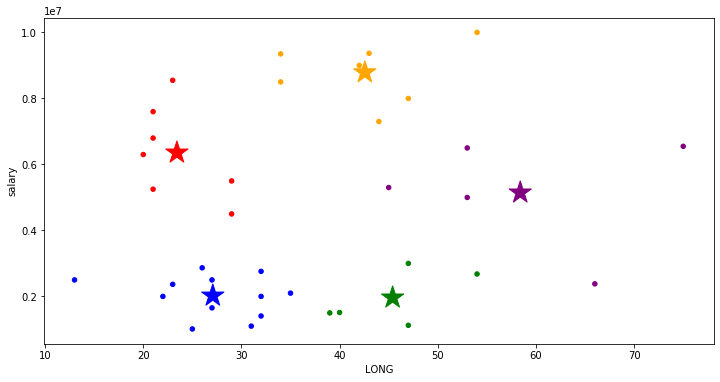

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

12.280835917867115

In [18]:
silhouette_score(X, km.labels_)

0.4160289407654863